## import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, classification_report

In [14]:
!pip install --upgrade --no-cache-dir gdown

## Raw data

In [ ]:
!gdown 1QFeTARp8NLkl1DV7jU3n020cX1VnAj4X
!gdown 1yu7DSY_AbQc-mKWfu-3GwfzfhiStR1iw

Downloading...
From (original): https://drive.google.com/uc?id=1QFeTARp8NLkl1DV7jU3n020cX1VnAj4X
From (redirected): https://drive.google.com/uc?id=1QFeTARp8NLkl1DV7jU3n020cX1VnAj4X&confirm=t&uuid=75394ed9-8059-4ede-9da2-c09b3ad96639
To: /content/real.npz
100% 303M/303M [00:03<00:00, 98.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1yu7DSY_AbQc-mKWfu-3GwfzfhiStR1iw
From (redirected): https://drive.google.com/uc?id=1yu7DSY_AbQc-mKWfu-3GwfzfhiStR1iw&confirm=t&uuid=737c43a6-198a-4476-a4f8-fa89d24a2cef
To: /content/fake.npz
100% 303M/303M [00:03<00:00, 83.8MB/s]


If gdown is down (put the data here, by any way)

In [ ]:
fake_data = np.load('/content/fake.npz')
real_data = np.load('/content/real.npz')

In [ ]:
fake_data['x'][0,:,:].shape

(1998, 101)

In [ ]:
freq_fake_arr = []
for idx in range(fake_data['x'][:,:,:].shape[0]):
  arr = sum(fake_data['x'][idx,:,:])
  freq_fake_arr.append(arr)

freq_real_arr = []
for idx in range(real_data['x'][:,:,:].shape[0]):
  arr = sum(real_data['x'][idx,:,:])
  freq_real_arr.append(arr)

<ipython-input-9-6e1982406398>:3: RuntimeWarning: overflow encountered in add
  arr = sum(fake_data['x'][idx,:,:])
<ipython-input-9-6e1982406398>:8: RuntimeWarning: overflow encountered in add
  arr = sum(real_data['x'][idx,:,:])


In [ ]:
the_fake_1998 = []
for idx in range(fake_data['x'][:,:,:].shape[0]):
  arr = sum(fake_data['x'][idx,:,:].T)
  the_fake_1998.append(arr)

the_real_1998 = []
for idx in range(real_data['x'][:,:,:].shape[0]):
  arr = sum(real_data['x'][idx,:,:].T)
  the_real_1998.append(arr)

<ipython-input-10-4b464d6e4b2a>:3: RuntimeWarning: overflow encountered in add
  arr = sum(fake_data['x'][idx,:,:].T)
<ipython-input-10-4b464d6e4b2a>:8: RuntimeWarning: overflow encountered in add
  arr = sum(real_data['x'][idx,:,:].T)


### Dealing with frequencies

In [ ]:
freq_fake_df = pd.DataFrame(freq_fake_arr)
freq_fake_df['is_fake'] = 1

freq_real_df = pd.DataFrame(freq_real_arr)
freq_real_df['is_fake'] = 0

In [ ]:
freq_df = pd.concat([freq_fake_df, freq_real_df])
freq_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,is_fake
0,inf,inf,inf,inf,57248.0,inf,inf,20976.0,326.75000,2.170000e+02,...,4.371094,5.121094,8.156250,4.226562,5.207031,9.187500,17.671875,42.156250,59.031250,1
1,inf,inf,inf,inf,inf,inf,42272.0,4880.0,963.50000,2.690000e+02,...,0.497559,0.639160,0.817871,1.177734,1.162109,1.378906,2.986328,5.250000,3.453125,1
2,inf,inf,inf,inf,inf,43008.0,23248.0,1990.0,27.40625,1.370312e+01,...,5.542969,5.675781,4.023438,4.558594,4.671875,5.332031,10.054688,13.343750,8.281250,1
3,13512.0,inf,inf,inf,inf,inf,inf,inf,46368.00000,4.396000e+03,...,8.953125,7.855469,8.078125,8.179688,4.894531,3.453125,3.369141,8.359375,11.265625,1
4,inf,inf,inf,inf,inf,26608.0,18480.0,5416.0,1078.00000,2.092500e+02,...,31.875000,31.640625,29.859375,18.375000,20.078125,27.500000,22.281250,87.875000,136.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,inf,inf,inf,inf,inf,inf,inf,inf,60640.00000,4.729600e+04,...,116.250000,138.000000,151.250000,131.125000,151.250000,166.375000,178.000000,816.500000,920.000000,0
746,37120.0,inf,inf,inf,inf,inf,28336.0,28048.0,31712.00000,inf,...,0.593750,0.705078,0.618164,2.054688,3.636719,2.564453,2.384766,2.585938,0.847168,0
747,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,38.031250,44.625000,50.156250,41.781250,27.843750,20.968750,14.828125,28.140625,29.500000,0
748,15344.0,inf,inf,inf,inf,inf,inf,inf,inf,6.486400e+04,...,42.406250,37.281250,41.500000,38.531250,69.937500,29.968750,23.328125,25.171875,27.843750,0


In [ ]:
freq_df.replace([np.inf, -np.inf], -10, inplace=True)

In [ ]:
freq_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,is_fake
0,-10.0,-10.0,-10.0,-10.0,57248.0,-10.0,-10.0,20976.0,326.75000,217.000000,...,4.371094,5.121094,8.156250,4.226562,5.207031,9.187500,17.671875,42.156250,59.031250,1
1,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,42272.0,4880.0,963.50000,269.000000,...,0.497559,0.639160,0.817871,1.177734,1.162109,1.378906,2.986328,5.250000,3.453125,1
2,-10.0,-10.0,-10.0,-10.0,-10.0,43008.0,23248.0,1990.0,27.40625,13.703125,...,5.542969,5.675781,4.023438,4.558594,4.671875,5.332031,10.054688,13.343750,8.281250,1
3,13512.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,46368.00000,4396.000000,...,8.953125,7.855469,8.078125,8.179688,4.894531,3.453125,3.369141,8.359375,11.265625,1
4,-10.0,-10.0,-10.0,-10.0,-10.0,26608.0,18480.0,5416.0,1078.00000,209.250000,...,31.875000,31.640625,29.859375,18.375000,20.078125,27.500000,22.281250,87.875000,136.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,60640.00000,47296.000000,...,116.250000,138.000000,151.250000,131.125000,151.250000,166.375000,178.000000,816.500000,920.000000,0
746,37120.0,-10.0,-10.0,-10.0,-10.0,-10.0,28336.0,28048.0,31712.00000,-10.000000,...,0.593750,0.705078,0.618164,2.054688,3.636719,2.564453,2.384766,2.585938,0.847168,0
747,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.00000,-10.000000,...,38.031250,44.625000,50.156250,41.781250,27.843750,20.968750,14.828125,28.140625,29.500000,0
748,15344.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.00000,64864.000000,...,42.406250,37.281250,41.500000,38.531250,69.937500,29.968750,23.328125,25.171875,27.843750,0


In [ ]:
freq_df.to_csv('/content/Frequencies_df.csv', index=False)

### PCA (freq - 2 components)

In case, you are not able to upload the drive data. Upload Frequencies_df and see the visualization

In [17]:
freq_df = pd.read_csv('/content/Frequencies_df.csv')

In [18]:
from sklearn.decomposition import PCA

In [19]:
X = freq_df.drop('is_fake', axis=1)
y = freq_df['is_fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principal_df = pd.DataFrame(data = principalComponents
                            , columns = ['principal component 1', 'principal component 2'])

In [21]:
final_df = principal_df.assign(target=pd.Series(y).values)
final_df

,principal component 1,principal component 2,target
0,-28340.705428,5376.083750,1
1,-36313.039983,-13043.174768,1
2,-43760.254761,-6017.219277,1
3,-5065.634673,-2340.038842,1
4,-39021.953389,-4199.211922,1
...,...,...,...
1495,87046.631628,-21277.293097,0
1496,727.286276,-30817.802401,0
1497,2027.633771,41456.129185,0
1498,36724.706872,33879.696983,0


In [22]:
principal_df.columns

Index(['principal component 1', 'principal component 2'], dtype='object')

In [23]:
import matplotlib.pyplot as plt

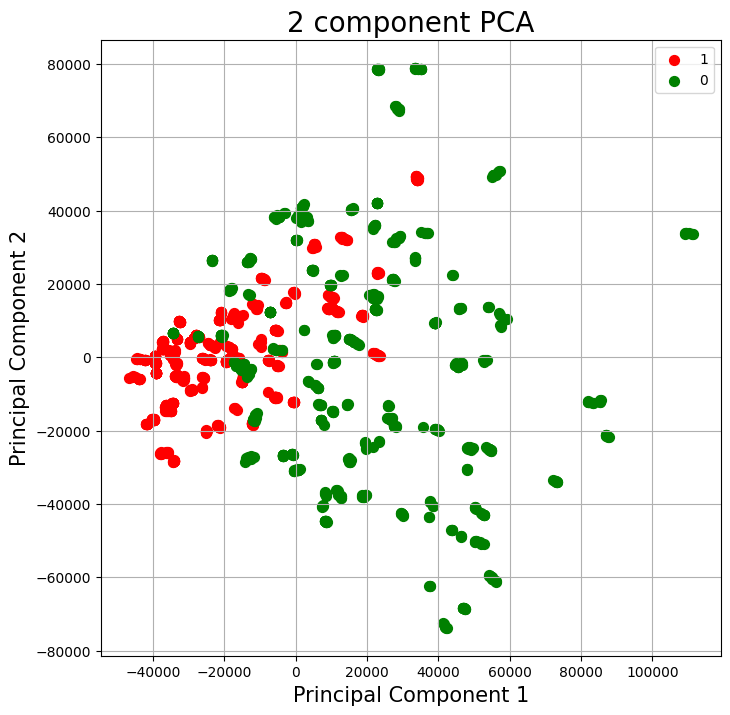

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The read points represents the real data with is "DELL", You can see that it follows certain distribution (it takes linear regression trend, this trend has meaning too). On the other hand, the green data is random (Fooled).

While using 2 components you can separate between real and fake data. But for 100% accuracy and avoiding overfitting problems. You can use more than 2 components, if you wish.